![ADSA Logo](http://i.imgur.com/BV0CdHZ.png?2 "ADSA Logo")

# Fall 2017 ADSA Workshop - Introduction to Machine Learning
Workshop content adapted from:
* [Introduction to Machine Learning with Python](https://github.com/amueller/introduction_to_ml_with_python)
* [info490-sp17](https://github.com/lcdm-uiuc/info490-sp17/tree/d91b9099c5c26722d56fd3dbffbca13a6f72b6d2/notebooks)
***

This workshop will be focusing on the following topics
    - Review on previous workshops
        * Numpy
        * Scipy
        * Matplotlib
        * Pandas
    - Analyzing the data
    - Training and testing data
    - Visualizing the data
    - K-Nearest Neighbors
    - Making predictions

In [1]:
from preamble import *
%matplotlib inline

## Introduction
### What is machine learning?
###  - Machine learning is an application of artificial intelligence (AI) that provides systems ###  the ability to automatically learn and improve from experience without being explicitly programmed.### Problems that machine learning can solve

##### NumPy

In [2]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


##### SciPy

In [3]:
from scipy import sparse

# create a 2d NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))

NumPy array:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [4]:
# convert the NumPy array to a SciPy sparse matrix in CSR format
# only the non-zero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


##### matplotlib

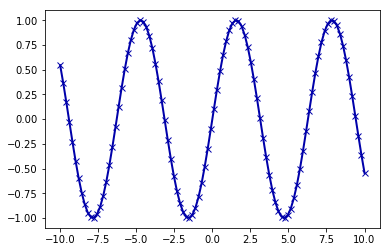

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# create a second array using sinus
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

##### pandas

In [7]:
import pandas as pd
from IPython.display import display

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


In [8]:
# One of many possible ways to query the table:
# selecting all rows that have an age column greate than 30
display(data_pandas[data_pandas.Age > 30])

,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda


### A First Application: Classifying iris species
![sepal_petal](https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/cccbbca86d00f9d5ffb643c740de4489de80436d/images/iris_petal_sepal.png)

#### Meet the data

In [9]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [10]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['target', 'target_names', 'feature_names', 'data', 'DESCR'])


In [11]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [12]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [13]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [15]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [16]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [17]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [18]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [19]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and testing data

In [20]:
from sklearn.model_selection import train_test_split

More information on this function on 
[train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [22]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [23]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


#### First things first: Look at your data

In [24]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
print(iris_dataframe)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.9               3.0                4.2               1.5
1                  5.8               2.6                4.0               1.2
2                  6.8               3.0                5.5               2.1
3                  4.7               3.2                1.3               0.2
4                  6.9               3.1                5.1               2.3
5                  5.0               3.5                1.6               0.6
6                  5.4               3.7                1.5               0.2
7                  5.0               2.0                3.5               1.0
8                  6.5               3.0                5.5               1.8
9                  6.7               3.3                5.7               2.5
10                 6.0               2.2                5.0               1.5
11                 6.7               2.5                5.8     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116d955c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117758390>]], dtype=object)

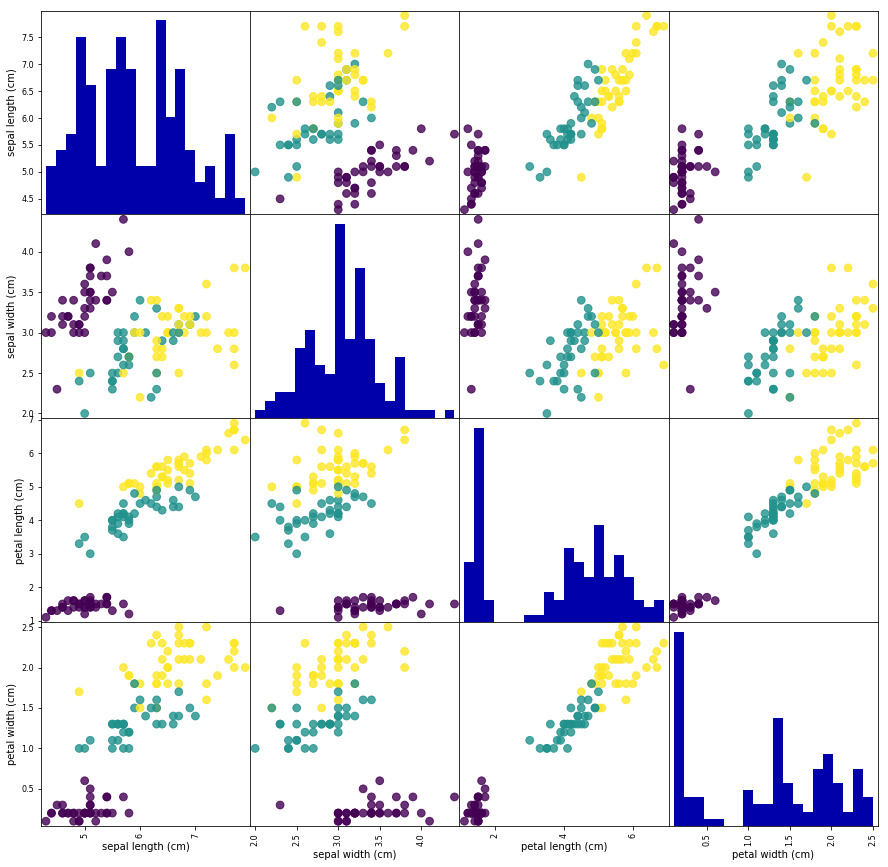

In [25]:
# create a scatter matrix from the dataframe, color by y_train
pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)

#### Building your first model: k nearest neighbors

-----

## [k-Nearest Neighbors][knn] (K-NN)

The first algorithm we will explore is one of the simplest, the
[k-nearest neighbor][knn] algorithm. Fundamentally, this algorithm is
remarkable simple and is based on the principle that data values in an
$N$- dimensional space are generally located near other similar objects.
The number of nearest neighbors, k, is a tuning parameter, and can be
specified a priori or in some algorithms empirically determined. The
basic principle behind k-nn is demonstrated in the following figure from
Wikipedia:

![knn Image from Wikipedia][knni]

As shown in the image, when a new datum is added, the classification
must be assigned. In the case of k-nn, this is done by looking at the
nearest neighbors and using some statistical evaluation of their
classes. For example, we could use some weighted combination of the
nearest neighbors, where the weight might be determined by the relative
distance of each neighbor from the datum of interest. 

In the following code cells, we demonstrate how to perform knn
classification by using scikit-learn. In this example, we use five
nearest neighbors (but this value can be easily adjusted to see how the
classification performance changes). The standard classification
process in scikit-learn is to first fit a model to the training data
and to subsequently apply this model to predict values for the testing
data. After this process, we first compute the prediction score before
displaying the confusion matrix for this algorithm.

-----

[knn]: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
[knni]: https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/500px-KnnClassification.svg.png

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Making predictions

In [28]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [29]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the model

In [30]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [31]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [32]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary and Outlook

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
